In [1]:
import os
os.chdir("..")
os.getcwd()

'/Users/laurasisson/odor-pair'

In [2]:
import json
with open("dataset/full.json") as f:
    full_data = json.load(f)
full_data[0]

{'mol1': 'CCCCC/C=C/C(=O)OC',
 'mol1_notes': ['violet',
  'sweet',
  'oily',
  'melon',
  'pear',
  'hairy',
  'costus',
  'fruity',
  'violet leaf',
  'waxy',
  'fresh',
  'green'],
 'mol2': 'CCCCCOC(=O)CCC',
 'mol2_notes': ['cherry',
  'sweet',
  'pineapple',
  'fruity',
  'banana',
  'tropical'],
 'blend_notes': ['animal', 'fruity', 'waxy']}

In [3]:
import random
random_seed = 3
random.seed(random_seed)

In [4]:
import graph.utils
import graph.stats
import graph.coverage

In [5]:
train_edges, test_edges = graph.coverage.random_split_carving(tf=.1)

In [6]:
print(graph.stats.kl_similarity(train_edges))
print(graph.stats.kl_similarity(test_edges))


tensor(0.7719)
tensor(0.9951)


In [7]:
from tqdm.notebook import tqdm
import numpy as np

iters = 100
eps = 1e-2
reps = 5

train_sim = []
test_sim = []
tt_sim = []
tt_sim2 = []
x = []

for tf in tqdm(np.linspace(eps, 1-eps, iters),smoothing=0):
    train_sim_reps = []
    test_sim_reps = []
    tt_sim_reps = []
    tt_sim2_reps = []
    
    for _ in range(reps):
        train_edges, test_edges = graph.coverage.random_split_carving(tf=tf)   
        train_sim_reps.append(graph.stats.kl_similarity(train_edges))
        test_sim_reps.append(graph.stats.kl_similarity(test_edges))
        tt_sim_reps.append(graph.stats.kl_similarity(train_edges,test_edges))
        tt_sim2_reps.append(graph.stats.kl_similarity(test_edges,train_edges))
        
    x.append(tf)
    train_sim.append(np.mean(train_sim_reps))
    test_sim.append(np.mean(test_sim_reps))
    tt_sim.append(np.mean(tt_sim_reps))
    tt_sim2.append(np.mean(tt_sim2_reps))


  0%|          | 0/100 [00:00<?, ?it/s]

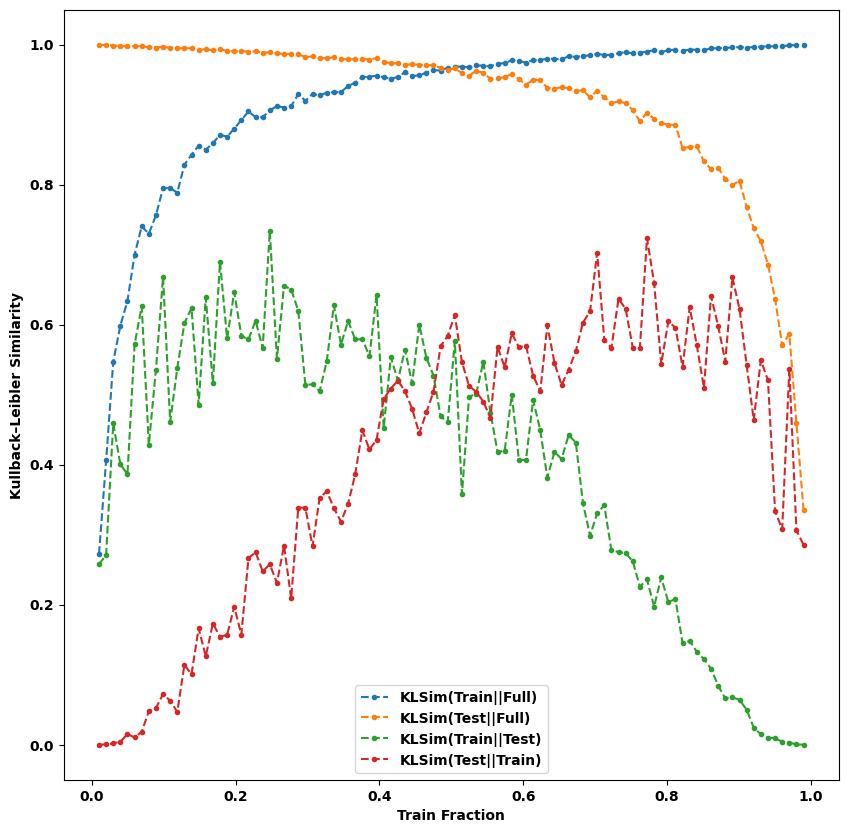

In [8]:
import matplotlib.pyplot as plt
import utils

fig, ax = utils.standard_fig_ax()

# Create the plot
plt.plot(x, train_sim, label='KLSim(Train||Full)', marker='.',linestyle='dashed')
plt.plot(x, test_sim, label='KLSim(Test||Full)', marker='.',linestyle='dashed')
plt.plot(x, tt_sim, label='KLSim(Train||Test)', marker='.',linestyle='dashed')
plt.plot(x, tt_sim2, label='KLSim(Test||Train)', marker='.',linestyle='dashed')

# Add labels and title
plt.xlabel('Train Fraction')
plt.ylabel('Kullback–Leibler Similarity')

# Add a legend
plt.legend()
utils.save_figures(f"kldiv", fig)

# Display the plot
plt.show()

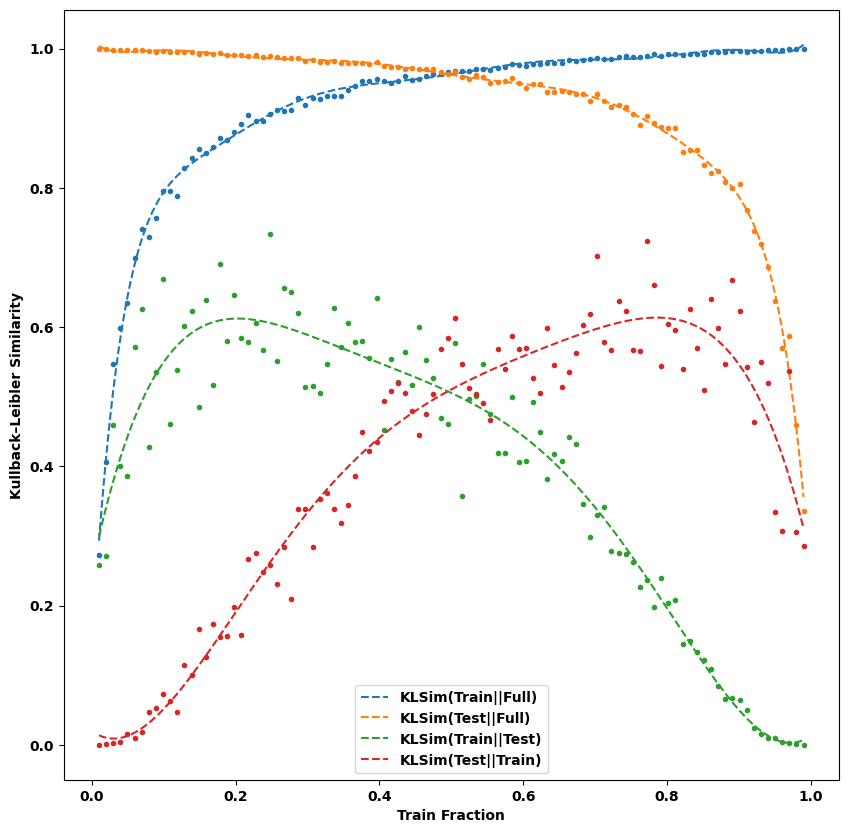

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import utils

# Fit a cubic polynomial (degree 3) to the data
train_coeff = np.polyfit(x, train_sim, 9)
test_coeff = np.polyfit(x, test_sim, 9)
tt_coeff = np.polyfit(x, tt_sim, 5)
tt2_coeff = np.polyfit(x, tt_sim2, 5)

# Create a polynomial function from the coefficients
train_poly = np.poly1d(train_coeff)
test_poly = np.poly1d(test_coeff)
tt_poly = np.poly1d(tt_coeff)
tt2_poly = np.poly1d(tt2_coeff)

# Create a smooth range of x values for plotting the fitted curves
x_smooth = np.linspace(min(x), max(x), 500)

# Evaluate the polynomial at the smooth x values
train_smooth = train_poly(x_smooth)
test_smooth = test_poly(x_smooth)
tt_smooth = tt_poly(x_smooth)
tt2_smooth = tt2_poly(x_smooth)

fig, ax = utils.standard_fig_ax()

# Plot the original points with markers and cubic best-fit lines using color cycle
plt.plot(x, train_sim, '.', color='C0')  # No label for points, use color 'C0'
plt.plot(x_smooth, train_smooth, label='KLSim(Train||Full)', linestyle='dashed', color='C0')

plt.plot(x, test_sim, '.', color='C1')  # No label for points, use color 'C1'
plt.plot(x_smooth, test_smooth, label='KLSim(Test||Full)', linestyle='dashed', color='C1')

plt.plot(x, tt_sim, '.', color='C2')  # No label for points, use color 'C2'
plt.plot(x_smooth, tt_smooth, label='KLSim(Train||Test)', linestyle='dashed', color='C2')

plt.plot(x, tt_sim2, '.', color='C3')  # No label for points, use color 'C3'
plt.plot(x_smooth, tt2_smooth, label='KLSim(Test||Train)', linestyle='dashed', color='C3')

# Add labels and title
plt.xlabel('Train Fraction')
plt.ylabel('Kullback–Leibler Similarity')

# Add a legend (only for the lines, since they carry the label)
plt.legend()
utils.save_figures(f"kldiv_polyfit_with_c_colors", fig)

# Display the plot
plt.show()
